In [ ]:
import os
from wce_cluster import WCECluster

base_path = "../evaluation_data/AnnotatedVideos_30FPS/"

folders = [f.path for f in os.scandir(base_path) if f.is_dir()]
for folder in folders:
    print("-----------------------")
    print(f"Section: {folder.split(os.sep)[-1]}")
    cluster = WCECluster(folder, minCl=[15,5,30], batch_size=32,smooth=True,fps=30,downsample_to_fps=10,save_full_fps=True)
    cluster.apply()

In [ ]:
import os
from model_name import Model
from wce_cluster import WCECluster

path = "../evaluation_data/AnnotatedVideos_30FPS/8a00709108cd4e2b/"
cluster = WCECluster(path, minCl=[50], batch_size=32,smooth=True,fps=30,save_full_fps=True,backbone=Model.RES_NET_101)
cluster.apply()

In [ ]:
from wce_cluster import WCECluster
from model_name import Model    
import pandas as pd
import os


base_path = "../evaluation_data/kvasir_capsule_sequences/selection/"
folders = [f.path for f in os.scandir(base_path) if f.is_dir()]
minCl = 200
minCLs = [300,500,1000]

def merge_model_evaluation_csvs(base_path, minCL):
        """
        Merge all CSV files within each model's Sigma directory across all datasets,
        aggregating per sigma and keeping models separate. The sigma directories are
        placed inside a directory called 'ExperimentsMinCl{minCL}'.

        :param base_path: Path to the Evaluation directory containing dataset directories.
        :param minCL: The value of minCL used in directory naming.
        :return: Dictionary with (model, sigma) tuples as keys and concatenated DataFrames as values.
        """
        evaluation_data = {}

        # Iterate through each dataset directory
        for dataset_dir in os.listdir(base_path):
            dataset_path = os.path.join(base_path, dataset_dir)

            if os.path.isdir(dataset_path):  # Ensure it's a directory (e.g., ncm_12)
                # Inside dataset directory, look for model directories (e.g., resnet, sigma1)
                for model_dir in os.listdir(dataset_path):
                    model_path = os.path.join(dataset_path, model_dir)

                    if os.path.isdir(model_path):  # Ensure it's a directory (model directory)
                        # Look for subdirectories starting with 'Sigma'
                        sigma_dirs = [d for d in os.listdir(model_path) if d.startswith('Sigma')]

                        for sigma_dir in sigma_dirs:
                            sigma_path = os.path.join(model_path, sigma_dir)

                            if os.path.isdir(sigma_path):
                                # Initialize list for this model and sigma
                                key = (model_dir, sigma_dir)
                                if key not in evaluation_data:
                                    evaluation_data[key] = []

                                # Inside Sigma directory, look for CSV files
                                csv_files = [f for f in os.listdir(sigma_path) if f.endswith('.csv')]

                                for csv_file in csv_files:
                                    file_path = os.path.join(sigma_path, csv_file)

                                    # Read the CSV file
                                    df = pd.read_csv(file_path)

                                    # Add columns for 'Dataset', 'Model', 'Sigma'
                                    df['Dataset'] = dataset_dir
                                    df['Model'] = model_dir
                                    df['Sigma'] = sigma_dir

                                    # Store the data in the evaluation_data dictionary under the (model, sigma) key
                                    evaluation_data[key].append(df)

        # Concatenate all the CSV files for each (model, sigma)
        combined_data = {}
        for key, dfs in evaluation_data.items():
            combined_data[key] = pd.concat(dfs, ignore_index=True)

        return combined_data


for minCl in minCLs:

    # for folder in folders:
    #     print("-----------------------")
    #     print(f"Section: {folder.split(os.sep)[-1]}")
    #     cluster = WCECluster(folder, minCl=[minCl], batch_size=32,smooth=True,fps=30,save_full_fps=True,evaluate=True,sigmas=[0,1,2,3,4,5])
    #     cluster.apply()
        
    for folder in folders:
        print("-----------------------")    
        print(f"Section: {folder.split(os.sep)[-1]}")
        cluster = WCECluster(folder, minCl=[minCl], batch_size=32,smooth=True,fps=30,backbone=Model.DEPTH_ANY_BASE,save_full_fps=True,evaluate=True, sigmas=[0,1,2,3,4,5])
        cluster.apply()


    # Example usage
    base_evaluation_path = "./dumps/Evaluation/"
    merged_results = merge_model_evaluation_csvs(base_evaluation_path, minCl)

    # Create the 'ExperimentsMinCl{minCL}' directory
    experiments_dir = f"./ExperimentsMinCl{minCl}"
    os.makedirs(experiments_dir, exist_ok=True)

    # Save the combined results into separate files for each model and sigma
    for (model, sigma), combined_df in merged_results.items():
        # Clean the sigma name to remove any file system incompatible characters if necessary
        safe_sigma = sigma.replace('/', '_').replace('\\', '_')
        # Create directory for this Sigma within 'ExperimentsMinCl{minCL}' if it doesn't exist
        sigma_dir = os.path.join(experiments_dir, safe_sigma)
        os.makedirs(sigma_dir, exist_ok=True)
        # Build the output path
        output_path = os.path.join(sigma_dir, f"combined_{model}_{safe_sigma}_results.csv")
        combined_df.to_csv(output_path, index=False)

    print(f"CSV files have been merged and saved into directories per Sigma within 'ExperimentsMinCl{minCl}'.")


t-SNE Plot without Gaussian filter:


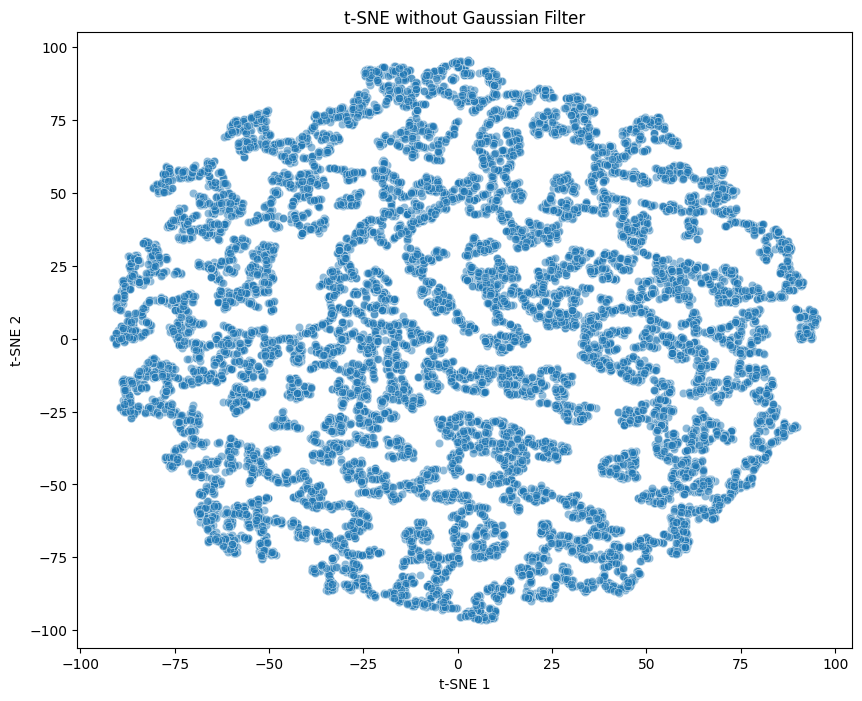

t-SNE Plot with Gaussian filter:


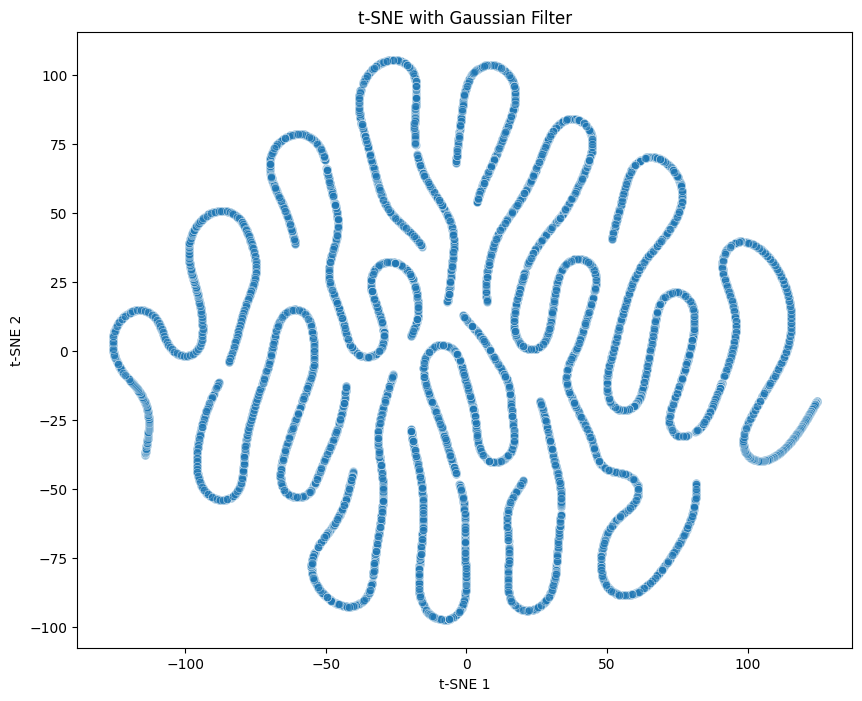

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.ndimage import gaussian_filter
import plotly.graph_objects as go



# Step 1: Generate random dense point cloud
np.random.seed(42)  # For reproducibility
num_points = 15000
point_cloud = np.random.rand(num_points, 3)  # Random points in 3D

# Step 2: Visualize t-SNE before applying Gaussian filter
def plot_tsne(points, title, plot_3d=False):
    # TSNE with 2 components for 2D plot
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(points)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], legend=None, alpha=0.5)
    plt.title(title)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()
    
    if plot_3d:
        # Create a 3D plotly plot of the original point cloud
        fig = go.Figure(data=[go.Scatter3d(
            x=np.arange(len(tsne_data[:, 0])), y=tsne_data[:, 0], z=tsne_data[:, 1],
            mode='markers', marker=dict(size=3, opacity=0.6)
        )])
        fig.update_layout(title=f"3D Point Cloud - {title}", width=800, height=600)
        fig.show()

# Step 3: Plot t-SNE without Gaussian filtering
print("t-SNE Plot without Gaussian filter:")
plot_tsne(point_cloud, "t-SNE without Gaussian Filter", plot_3d=True)

# Step 4: Apply Gaussian filter to the point cloud
sigma = 100  # Smoothing factor
smoothed_point_cloud = gaussian_filter(point_cloud, sigma=sigma, radius=3*sigma)

# Step 5: Plot t-SNE after applying Gaussian filtering
print("t-SNE Plot with Gaussian filter:")
plot_tsne(smoothed_point_cloud, "t-SNE with Gaussian Filter", plot_3d=True)

In [1]:
import os
from model_name import Model
from wce_clustering_v2 import WCECluster

path = "../evaluation_data/AnnotatedVideos_30FPS/"

folders = [f.path for f in os.scandir(path) if f.is_dir()]
for folder in folders:
    print("-----------------------")
    print(f"Section: {folder.split(os.sep)[-1]}")
    WCECluster(folder, minCl=[300], sigmas=[4],batch_size=32,smooth=True,fps=30,backbone=Model.CENDO_FM).apply()

xFormers not available
xFormers not available


-----------------------
Section: 6cb700585c4f4070
Beginning feature extraction...


Passing images through backbone: 100%|██████████| 832/832 [04:46<00:00,  2.91batch/s]


Features saved to ./dumps/Features/6cb700585c4f4070/CENDO_FM_30FPS_features.npy


xFormers not available
xFormers not available


Processing sigma: 4
Processing minCl: 300, minSpl: 1 for sigma: 4


KeyboardInterrupt: 